In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Fraud Detection Case Study

# ------------------------------------------
# Section 1: Load Data and Basic Exploration
# ------------------------------------------
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from imblearn.over_sampling import SMOTE


In [4]:

# Load the dataset chunk
file_path = "/content/Fraud.csv"  # Replace with full path if running locally
df = pd.read_csv(file_path)

In [5]:

# Preview data
print("Shape of data:", df.shape)
print(df.head())
print(df['isFraud'].value_counts(normalize=True))


Shape of data: (6362620, 11)
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86   

      nameDest  oldbalanceDest  newbalanceDest  isFraud  isFlaggedFraud  
0  M1979787155             0.0             0.0        0               0  
1  M2044282225             0.0             0.0        0               0  
2   C553264065             0.0             0.0        1               0  
3    C38997010         21182.0             0.0        1               0  
4  M1230701703             0.0             0.0        0               0  
isFraud
0    0.998709
1    0.001291
Name: proportion, dtype: float64


In [6]:


# ------------------------------------------
# Section 2: Data Cleaning and Feature Engineering
# ------------------------------------------
# Drop identifiers that won't help model directly
df.drop(['nameOrig', 'nameDest'], axis=1, inplace=True)

# Encode 'type' using LabelEncoder
le = LabelEncoder()
df['type_encoded'] = le.fit_transform(df['type'])
df.drop('type', axis=1, inplace=True)

# Create balance difference features
df['diffOrig'] = df['oldbalanceOrg'] - df['newbalanceOrig']
df['diffDest'] = df['newbalanceDest'] - df['oldbalanceDest']

# Check for missing values
print("Missing values:\n", df.isnull().sum())


Missing values:
 step              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
type_encoded      0
diffOrig          0
diffDest          0
dtype: int64


In [7]:

# ------------------------------------------
# Section 3: Train-Test Split and Resampling
# ------------------------------------------
X = df.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = df['isFraud']

# Handle imbalance using SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)





In [8]:

# ------------------------------------------
# Section 4: Model Training and Evaluation
# ------------------------------------------
model = RandomForestClassifier(n_estimators=10, max_depth=10, random_state=42)

model.fit(X_train_res, y_train_res)
y_pred = model.predict(X_test)

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))




Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00   1906351
           1       0.12      0.99      0.22      2435

    accuracy                           0.99   1908786
   macro avg       0.56      0.99      0.61   1908786
weighted avg       1.00      0.99      0.99   1908786

Confusion Matrix:
 [[1889138   17213]
 [     21    2414]]
ROC-AUC Score: 0.9982189311937862


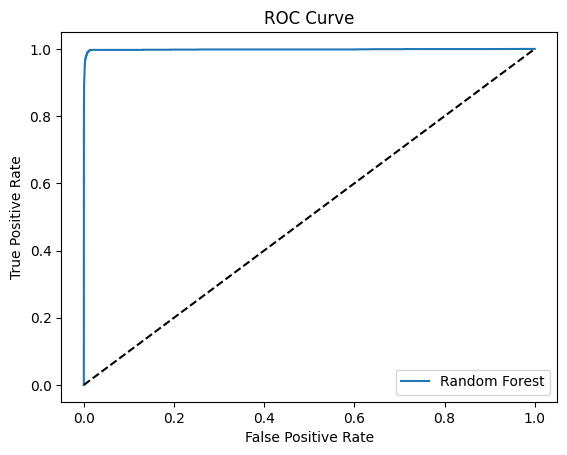

In [9]:
# Plot ROC Curve
fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

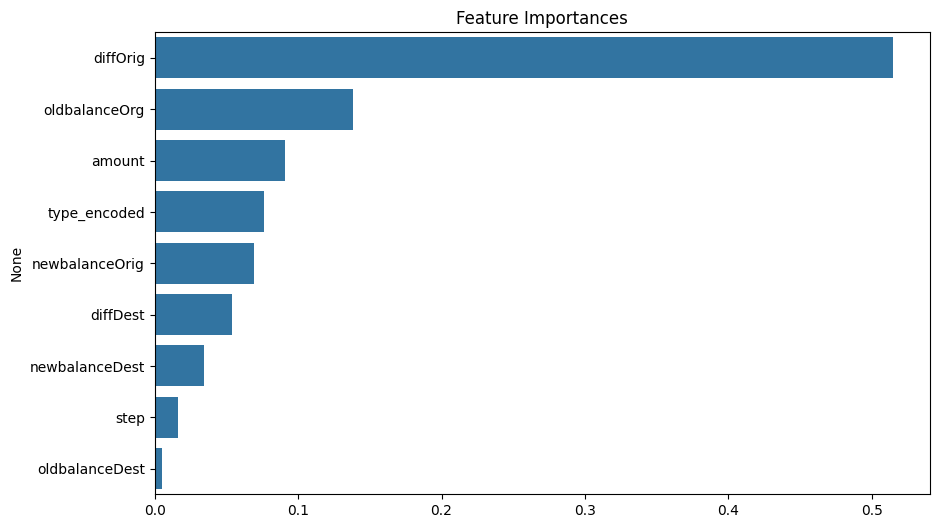

In [10]:
# ------------------------------------------
# Section 5: Feature Importance
# ------------------------------------------
importances = model.feature_importances_
features = X.columns
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
sns.barplot(x=importances[indices], y=features[indices])
plt.title('Feature Importances')
plt.show()